In [1]:
import SimpleITK as sitk
import numpy as np
import os

# Load the CT image
input_path = "image/left_knee.nii"
image = sitk.ReadImage(input_path)

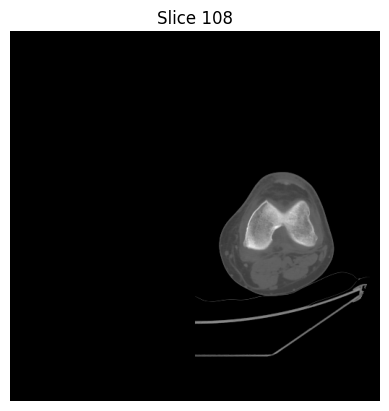

In [9]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load the NIfTI image
img = sitk.ReadImage("image/left_knee.nii.gz")
img_array = sitk.GetArrayFromImage(img)  # shape: (slices, height, width)

# Select a slice (e.g., middle slice)
slice_index = img_array.shape[0] // 2
slice_img = img_array[slice_index]

# Apply bone windowing (example: window center 300, width 1500)
def apply_window(image, center, width):
    min_val = center - width // 2
    max_val = center + width // 2
    image = (image - min_val) / (max_val - min_val)
    image = image.clip(0, 1)
    return image

windowed_img = apply_window(slice_img, center=300, width=1500)

# Plot
plt.imshow(windowed_img, cmap="gray")
plt.title(f"Slice {slice_index}")
plt.axis("off")
plt.show()
